# XBGoost (exoplanets) - Classification
[ch4-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch4-gradient-boosting.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [4]:
!wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter04/exoplanets.csv.zip
!unzip -o exoplanets.csv.zip

Archive:  exoplanets.csv.zip
  inflating: exoplanets.csv          


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### Shuffle

In [6]:
#from sklearn.utils import shuffle
#df = shuffle(df, random_state=2)

#df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

## Split train/test dataset

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0] - 1

## Classification Model Selection

In [49]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [50]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

[00:06:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [51]:
cross_validation(XGBClassifier(booster='gblinear'))

[00:06:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

[00:07:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:08:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

## HPO

### Default

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# define model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

# default model accuacry 
def getAccuracy(model):
    start = time.time()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    default_score = accuracy_score(y_pred, y_test)

    print('Elapsed time: %0.2fs' % (time.time()-start))    
    print('default score: %0.2f' % (default_score))

getAccuracy(model)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

X = df.iloc[:,1:]
y = df.iloc[:,0] - 1

def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15,8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals)
    plt.show()

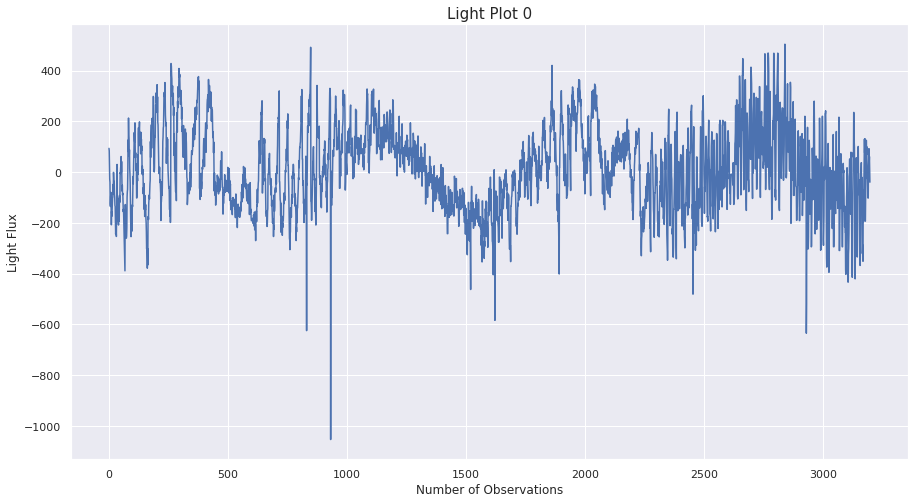

In [32]:
light_plot(0)

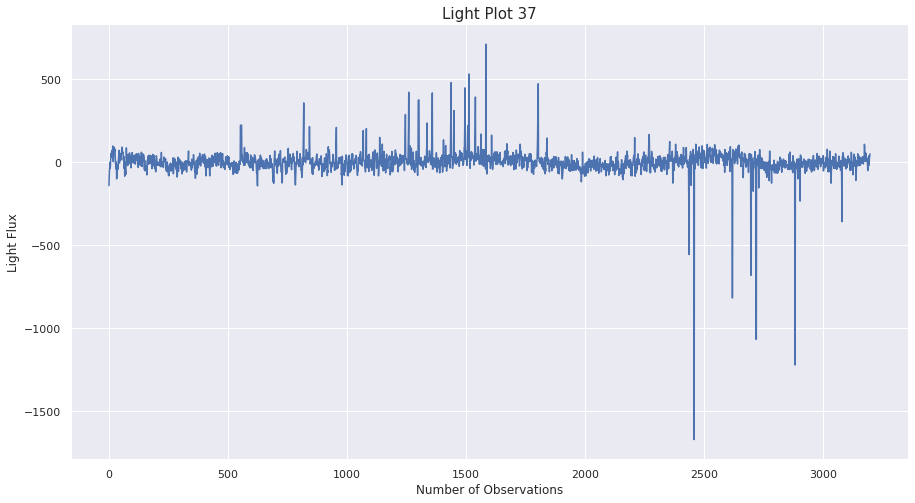

In [33]:
light_plot(37)

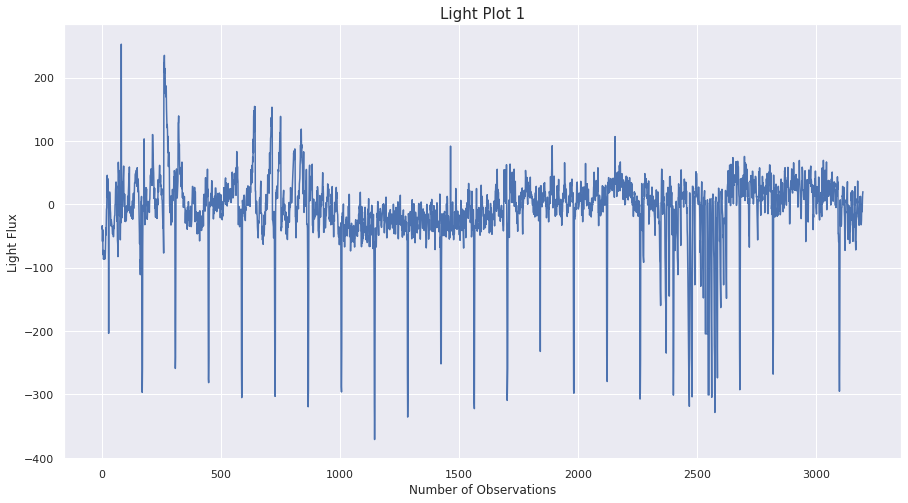

In [34]:
light_plot(1)

### Resampling

In [35]:
def xgb_clf(model, nrows):
    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    
    X = df.iloc[:,1:]
    y = df.iloc[:,0] - 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy: %0.2f' % (accuracy))
    
    recall = recall_score(y_test, y_pred)
    print('Recall: %0.2f' % (recall))
    
    # print(confusion_matrix(y_test, y_pred))    
    print(classification_report(y_test, y_pred))    
        
    return recall

### Undersampling

In [36]:
recall = xgb_clf(XGBClassifier(), nrows=800)
print('Recall: %0.2f' % (recall))

[10:49:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.95
Recall: 0.10
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.50      0.10      0.17        10

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200

Recall: 0.10


In [37]:
recall = xgb_clf(XGBClassifier(), nrows=200)
print('Recall: %0.2f' % (recall))

[10:49:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.84
Recall: 0.38
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.38      0.56        13

    accuracy                           0.84        50
   macro avg       0.91      0.69      0.73        50
weighted avg       0.87      0.84      0.81        50

Recall: 0.38


In [38]:
xgb_clf(XGBClassifier(), nrows=74)

[10:49:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.63
Recall: 0.55
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.75      0.55      0.63        11

    accuracy                           0.63        19
   macro avg       0.65      0.65      0.63        19
weighted avg       0.66      0.63      0.63        19



0.5454545454545454

### Oversampling

In [39]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [40]:
newdf = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==1].values,9,axis=0))
newdf.columns = df_train.columns
df_train_resample = pd.concat([df_train, newdf])

df_train_resample['LABEL'].value_counts()

0.0    3789
1.0     260
Name: LABEL, dtype: int64

In [41]:
df_train_resample.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
2358,0.0,-188.30,-212.77,-221.72,-188.92,-189.23,-124.94,-113.06,-105.84,-81.58,...,-253.64,-267.41,-269.56,-256.05,-217.06,-207.55,-111.59,-49.17,9.59,37.48
527,0.0,29.16,29.76,20.86,26.43,22.71,13.50,9.77,15.67,11.58,...,-9.95,-15.47,-16.44,-9.05,-0.63,-14.11,-17.09,-21.41,-11.93,-18.49
1061,0.0,5.27,1.55,-3.50,-7.32,-3.34,-17.52,-4.75,-9.30,-9.19,...,-7.10,-13.99,-8.26,-5.36,1.41,-2.35,-11.07,-2.45,4.02,-7.32
2085,0.0,262.53,269.00,248.65,256.60,260.04,252.23,246.30,241.87,237.41,...,-6.48,-11.60,-7.46,5.90,0.43,1.66,28.04,30.76,33.35,36.42
4456,0.0,2.21,-0.65,-3.73,-1.16,-1.32,-4.14,4.05,2.66,1.12,...,6.37,6.57,9.66,1.15,7.57,5.64,4.84,3.78,4.92,7.56


In [42]:
X_train_resample = df_train_resample.iloc[:,1:]
y_train_resample = df_train_resample.iloc[:,0]

In [43]:
model = XGBClassifier()

model.fit(X_train_resample, y_train_resample)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: %0.2f' % (accuracy))
    
recall = recall_score(y_test, y_pred)
print('Recall: %0.2f' % (recall))
    
# print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred)) 

[10:49:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.99
Recall: 0.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.98      0.99      0.99      1272



### Tunning

In [44]:
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

df['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [45]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [46]:
model = XGBClassifier(scale_pos_weight=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[10:49:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1260    1]
 [  11    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.98      0.99      0.99      1272

0.0


In [47]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold, cross_val_score

In [48]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

model = XGBClassifier(scale_pos_weight=10)

recalls = cross_val_score(model, X, y, cv=kfold, scoring='recall')

print('Recall: ', recalls)

print('Avg. recall: ', recalls.mean())

[10:50:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall:  [0.05263158 0.        ]
Avg. recall:  0.02631578947368421


## HPO: Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print("best score: {:.3f}".format(best_score))
    
    return best_model

In [ ]:
import time
start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

In [ ]:
df_all = pd.read_csv('exoplanets.csv')
df_all['LABEL'] = df_all['LABEL'].replace(1, 0)
df_all['LABEL'] = df_all['LABEL'].replace(2, 1)

X_all = df_all.iloc[:,1:]
y_all = df_all.iloc[:,0]

In [ ]:
df_all['LABEL'].value_counts()

In [ ]:
weight = int(5050/37)

In [ ]:
model = XGBClassifier(scale_pos_weight=weight)

recalls = cross_val_score(model, X_all, y_all, cv=kfold, scoring='recall')

print('Recall:', recalls)
print('Avg. recall:', recalls.mean())

In [ ]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

In [ ]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [ ]:
final_model(X_short, y_short, 
            XGBClassifier(max_depth=2, colsample_by_node=0.5, 
                          random_state=2))

In [ ]:
final_model(X, y, 
            XGBClassifier(max_depth=2, colsample_bynode=0.5, 
                          scale_pos_weight=10, random_state=2))

In [ ]:
final_model(X_all, y_all, 
            XGBClassifier(max_depth=2, colsample_bynode=0.5, 
                          scale_pos_weight=weight, random_state=2))